# L5: Exercise: Custom Convnets

In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


Design a Convnet:

1) Define Mode

In [3]:
model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    # YOUR CODE HERE
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

2) Compile

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    # Add loss and metric
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

3) Train the Model

In [5]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 11s 68ms/step - loss: 0.6816 - binary_accuracy: 0.5744 - val_loss: 0.6691 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 4s 53ms/step - loss: 0.6671 - binary_accuracy: 0.5787 - val_loss: 0.6616 - val_binary_accuracy: 0.5785
Epoch 3/50
80/80 [==============================] - 4s 53ms/step - loss: 0.6620 - binary_accuracy: 0.5787 - val_loss: 0.6507 - val_binary_accuracy: 0.5785
Epoch 4/50
80/80 [==============================] - 4s 54ms/step - loss: 0.6532 - binary_accuracy: 0.5787 - val_loss: 0.6445 - val_binary_accuracy: 0.5785
Epoch 5/50
80/80 [==============================] - 4s 55ms/step - loss: 0.6497 - binary_accuracy: 0.5892 - val_loss: 0.6390 - val_binary_accuracy: 0.5965
Epoch 6/50
80/80 [==============================] - 4s 55ms/step - loss: 0.6401 - binary_accuracy: 0.6312 - val_loss: 0.6347 - val_binary_accuracy: 0.5949
Epoch 7/50
80/80 [==============================] - 4s 55ms/step - lo

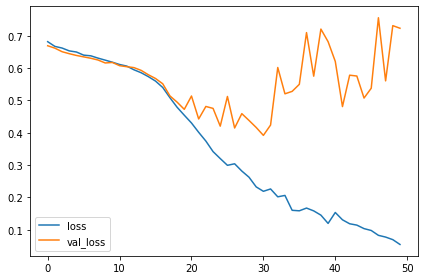

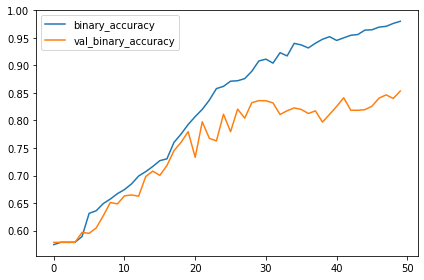

In [6]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();